<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml15_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원 축소, 주성분 분석(PCA, Principal Component Analysis)

# Imports

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋

In [5]:
!wget https://bit.ly/fruits_300 -O fruits.npy

--2025-08-20 01:45:33--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-08-20 01:45:33--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-08-20 01:45:34--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [6]:
fruits = np.load('fruits.npy')  # npy 파일을 읽어서 numpy 배열 생성

In [7]:
fruits.shape    # (samples, width, height)

(300, 100, 100)

In [8]:
def plot_array(arr, ncols=10):
    # arr : (samples, width, height) shape의 3차원 배열로 가정
    n = len(arr)    # 샘플 개수
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:  # ax는 1차원 ndarray
                if idx < n: # 샘플이 있는 경우
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:           # ax는 2차원 배열
                if idx < n:
                    ax[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                ax[i,j].axis('off')
    plt.show()

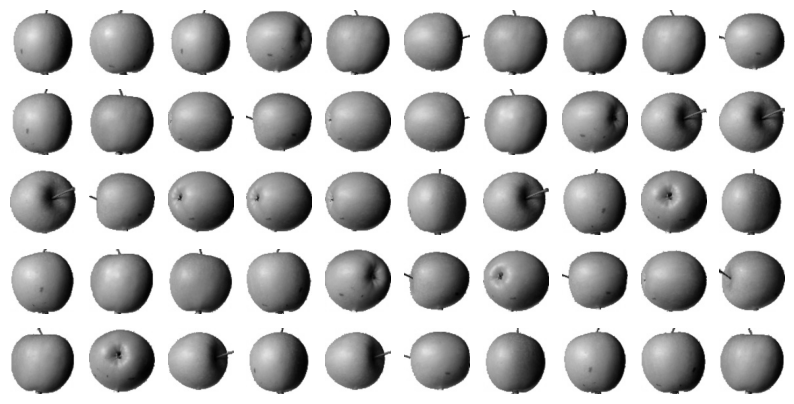

In [9]:
plot_array(fruits[:50])

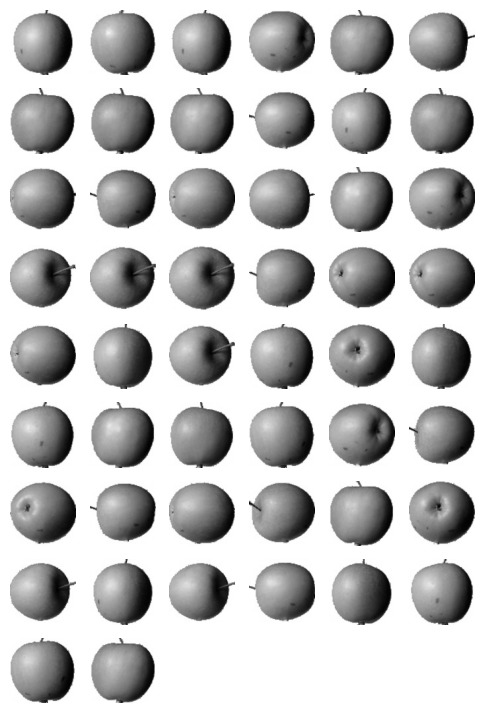

In [10]:
plot_array(fruits[:50], ncols=6)

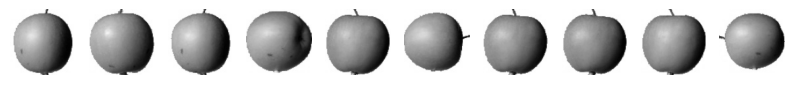

In [11]:
plot_array(fruits[:10])

# PCA

주성분 분석
* 훈련 셋에서 분산이 최대가 되는 축을 찾음.
* 첫번째 축에 수직이면서(직교하는) 남은 분산이 최대가 되는 축을 찾음.
* 이전에 찾은 두 축에 모두 수직이면서 남은 분산이 최대가 되는 축을 찾음.
* 위의 과정을 반복.
* 주성분 분석을 사용해서 차원을 축소. 원래 차원으로 재구성할 수도 있음.

In [12]:
# scikit-learn 클래스를 사용하기 위해서 3d ndarray를 2d ndarray로 변환
fruits_2d = fruits.reshape((300, -1))

In [13]:
fruits_2d.shape # (samples, pixels)

(300, 10000)

In [14]:
# PCA 클래스 객체 생성
pca = PCA(n_components=50, random_state=42)     # 주성분 벡터를 50개 선택.

In [15]:
# 비지도 학습(데이터셋 훈련) -> 50개의 주성분을 찾음.
pca.fit(X=fruits_2d)

PCA(n_components=50, random_state=42)

In [16]:
# PCA에서 찾은 50개 주성분
pca.components_.shape   #> (n_components, n_features)

(50, 10000)

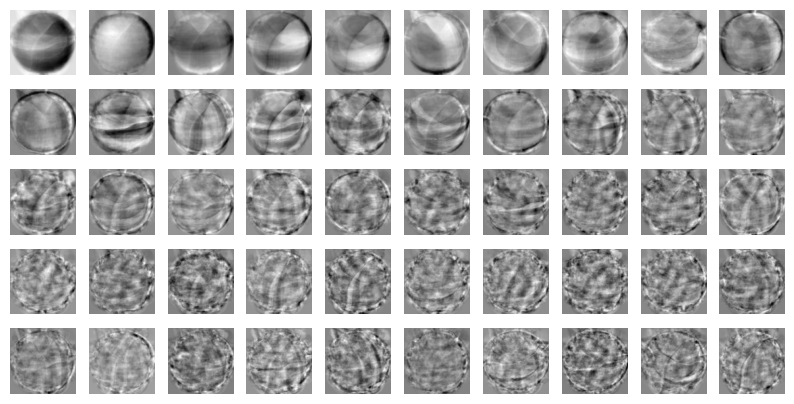

In [17]:
plot_array(pca.components_.reshape((-1, 100, 100)), ncols=10)

## 차원 축소

`PCA.transform()` 메서드 호출.

In [18]:
fruits_2d_reduced = pca.transform(X=fruits_2d)

In [19]:
fruits_2d_reduced.shape     # (n_samples, n_components)

(300, 50)

## 차원 재구성 : 축소됐던 차원을 원래 차원으로 되돌림.

`PCA.inverse_transform()` 메서드 호출.

In [20]:
fruits_2d_reconst = pca.inverse_transform(X=fruits_2d_reduced)

In [21]:
fruits_2d_reconst.shape     #> (300, 10000)

(300, 10000)

원본 과일 이미지와 축소했다가 재구성한 이미지를 비교

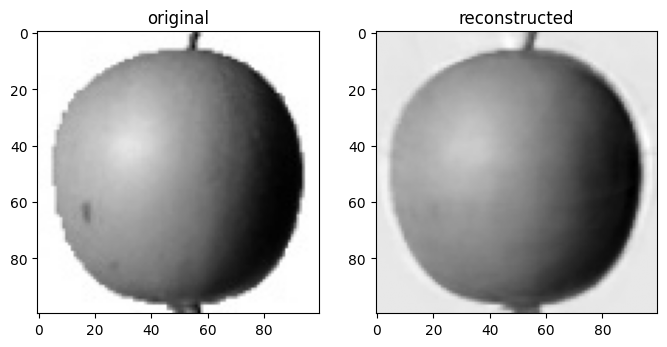

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
# ax[0].axis('off')
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[0].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

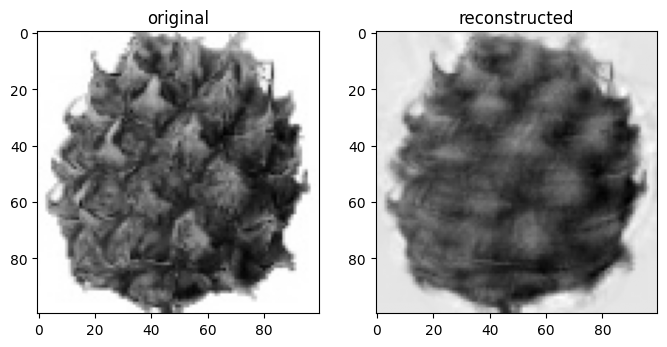

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[111], cmap=plt.cm.binary)
# ax[0].axis('off')
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[111].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

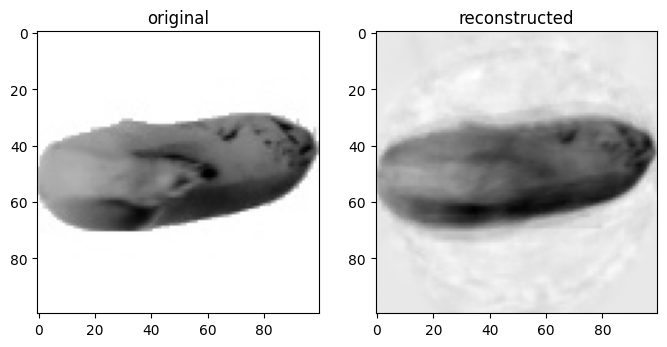

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[222], cmap=plt.cm.binary)
# ax[0].axis('off')
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[222].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

# 설명된 분산 비율(Explained Variance Ratio)

데이터 셋의 분산이 각 주성분 축에 따라 놓여 있는 비율.

In [25]:
pca.explained_variance_ratio_   # 설명된 분산 비율(0 ~ 1)

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.005112  , 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408041, 0.00389459, 0.00372441,
       0.00359278, 0.00331456, 0.00317751, 0.00304113, 0.00303726,
       0.00288691, 0.0027586 , 0.00264924, 0.00255716, 0.00252131,
       0.00247134, 0.0023926 , 0.00230641, 0.00221877, 0.00216722,
       0.00212795, 0.00193224, 0.00192632, 0.0019085 , 0.00182815,
       0.00180764, 0.00170779, 0.00166414, 0.00162624, 0.00156195])

In [26]:
np.sum(pca.explained_variance_ratio_)       # 전체 데이터의 92%를 설명함.

np.float64(0.9213948508475198)

In [27]:
np.cumsum(pca.explained_variance_ratio_)   # 누적합계

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.81464009,
       0.82109197, 0.82688092, 0.83199293, 0.83685674, 0.8416602 ,
       0.84613856, 0.85051173, 0.85459213, 0.85848672, 0.86221113,
       0.86580391, 0.86911847, 0.87229598, 0.87533711, 0.87837438,
       0.88126128, 0.88401989, 0.88666913, 0.88922629, 0.89174759,
       0.89421893, 0.89661153, 0.89891794, 0.90113672, 0.90330394,
       0.90543188, 0.90736412, 0.90929044, 0.91119895, 0.91302709,
       0.91483473, 0.91654252, 0.91820666, 0.9198329 , 0.92139485])

설명된 분산 비율을 y축으로 그린 선 그래프

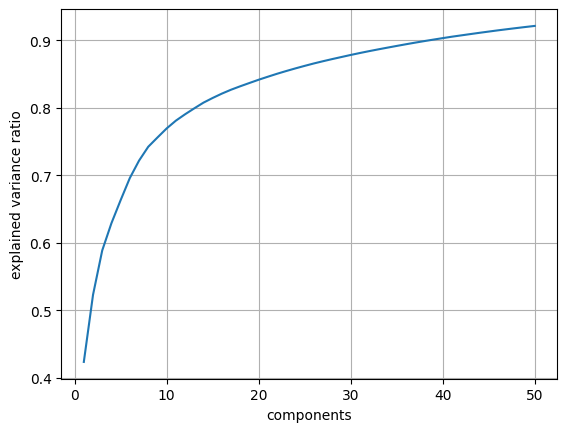

In [28]:
x = np.arange(1, 51)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, y)
plt.xlabel('components')
plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

## 적절한 차원(주성분)의 개수 찾기.

In [29]:
pca2 = PCA(random_state=42)     # n_components 파라미터를 설정하지 않은 PCA 객체 생성

In [30]:
pca2.fit(fruits_2d)     # 학습 -> 주성분 찾음.

PCA(random_state=42)

In [31]:
pca2.components_.shape      # PCA으로 찾은 주성분 축(axis) 배열

(300, 10000)

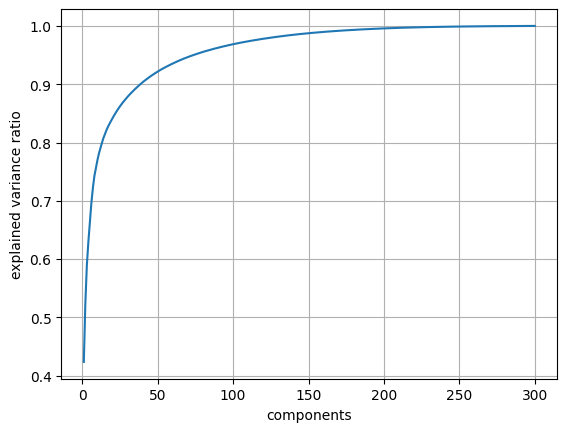

In [32]:
x = np.arange(1, 301)
y = np.cumsum(pca2.explained_variance_ratio_)       # 설명된 분산 비율들의 누적 합계

plt.plot(x, y)
plt.xlabel('components')
plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

PCA 객체를 생성할 때 n_components 파라미터를 설명된 분산비율(0.0 ~ 1.0)로 설정할 수도 있음.

In [33]:
pca3 = PCA(n_components=0.95, random_state=42)      # 95%까지 설명하는 주성분 개수로 만들겠다.
pca3.fit(X=fruits_2d)
pca3.components_.shape

(74, 10000)

설명된 분산 비율이 전체 데이터 분석의 95%인 주성분 개수는 74개이다.

In [34]:
fruits_2d_reduced = pca3.transform(X=fruits_2d) # 차원 축소
fruits_2d_reduced.shape

(300, 74)

In [35]:
fruits_2d_reconst = pca3.inverse_transform(X=fruits_2d_reduced)     # 차원 재구성
fruits_2d_reconst.shape

(300, 10000)

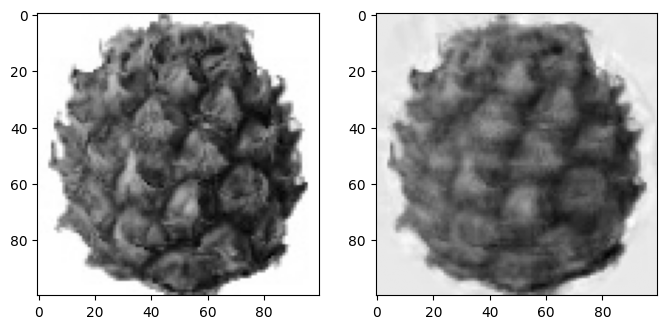

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

ax[0].imshow(fruits[100], cmap=plt.cm.binary)           # 원본
ax[1].imshow(fruits_2d_reconst[100].reshape((100, 100)), cmap=plt.cm.binary)        # 95% 재구성

plt.show()

# PCA와 지도학습(분류)

## 차원 축소 없이 분류

In [37]:
# 지도학습에 필요한 타겟 배열
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [38]:
# LogisticRegression을 사용한 분류
%%time
cv = cross_validate(estimator=LogisticRegression(random_state=42),  # ML 모델
                    X=fruits_2d,    # 특성 배열
                    y=target,       # 타겟 배열
                    return_train_score=True)

CPU times: user 3min 14s, sys: 120 ms, total: 3min 14s
Wall time: 25.2 s


In [39]:
type(cv)

dict

In [40]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [41]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [42]:
np.mean(cv['train_score'])

np.float64(1.0)

In [43]:
cv['test_score']

array([1.        , 1.        , 1.        , 0.98333333, 1.        ])

In [44]:
np.mean(cv['test_score'])

np.float64(0.9966666666666667)

## PCA로 차원 축소한 후 분류

### 95% 설명된 분산 비율

In [45]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X=fruits_2d)

PCA(n_components=0.95, random_state=42)

In [46]:
pca.n_components_    # PCA가 찾은 주성분 개수

np.int64(74)

In [47]:
fruits_2d_reduced = pca.transform(X=fruits_2d)      # 차원 축소

In [48]:
fruits_2d_reduced.shape

(300, 74)

In [49]:
# 교차 검증
%%time
cv = cross_validate(estimator=LogisticRegression(random_state=42),
                    X=fruits_2d_reduced,
                    y=target,
                    return_train_score=True)

CPU times: user 1.22 s, sys: 1.02 ms, total: 1.22 s
Wall time: 153 ms


In [50]:
np.mean(cv['train_score'])  # 훈련 점수

np.float64(1.0)

In [51]:
np.mean(cv['test_score'])   # 검증 점수

np.float64(0.9933333333333334)

### 50% 설명된 분산 비율

In [52]:
pca2 = PCA(n_components=0.5, random_state=42)
pca2.fit(X=fruits_2d)

PCA(n_components=0.5, random_state=42)

In [53]:
pca2.n_components_

np.int64(2)

In [54]:
fruits_2d_reduced = pca2.transform(X=fruits_2d)      # 차원 축소 - (300, 2)

In [55]:
fruits_2d_reduced.shape

(300, 2)

In [56]:
# 교차 검증
%%time
cv = cross_validate(estimator=LogisticRegression(random_state=42),
                    X=fruits_2d_reduced,
                    y=target,
                    return_train_score=True)

CPU times: user 1.61 s, sys: 4.99 ms, total: 1.61 s
Wall time: 209 ms


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [57]:
np.mean(cv['train_score'])  # 훈련 점수

np.float64(1.0)

In [58]:
np.mean(cv['test_score'])   # 검증 점수

np.float64(0.99)

# MNIST 데이터 셋

# MNIST PCA

## 데이터 셋

In [59]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True, as_frame=False)

In [60]:
X.shape

(70000, 784)

In [61]:
y.shape

(70000,)

In [62]:
y.dtype     #> 타겟 배열 : 문자열들의 배열.

dtype('O')

In [63]:
y = y.astype('int')     # 문자열을 int로 변환.  ('0' -> 0, '1' -> 1, ...)
y.dtype

dtype('int64')

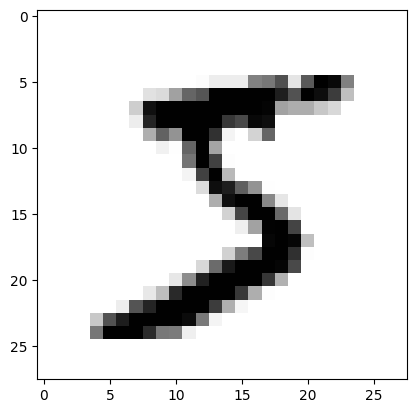

In [64]:
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [65]:
# 훈련 셋(60,000), 테스트 셋(10,000) 분리
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## 차원 축소 없이 Random Forest

In [66]:
# Random Forest Classifier 객체 생성
rand_forest = RandomForestClassifier(random_state=42)

In [67]:
# ML 모델 학습
%%time
rand_forest.fit(X=X_train, y=y_train)

CPU times: user 42.3 s, sys: 17.7 ms, total: 42.3 s
Wall time: 42.4 s


RandomForestClassifier(random_state=42)

In [68]:
# 훈련 셋 예측값
%%time
train_pred = rand_forest.predict(X_train)

CPU times: user 2 s, sys: 11 ms, total: 2.01 s
Wall time: 2.01 s


In [69]:
accuracy_score(y_train, train_pred)     # 훈련 셋 정확도

1.0

In [70]:
# 테스트 셋 예측값
%%time
test_pred = rand_forest.predict(X_test)

CPU times: user 374 ms, sys: 1 ms, total: 375 ms
Wall time: 374 ms


In [71]:
accuracy_score(y_test, test_pred)       # 테스트 셋 정확도

0.9705

## 차원 축소 후 Random Forest

95% 설명된 분산 비율을 갖도록 PCA 수행.

In [72]:
pca = PCA(n_components=0.95, random_state=42)       # PCA 객체 생성

In [73]:
X_train_reduced = pca.fit_transform(X_train)       # 훈련 셋 차원 축소

In [74]:
X_train_reduced.shape
#> (60_000, 784) --> (60_000, 154)  차원이 축소 되었음.

(60000, 154)

In [75]:
rand_forest2 = RandomForestClassifier(random_state=42)  # ML 모델 생성

In [76]:
%%time
rand_forest2.fit(X=X_train_reduced, y=y_train)

CPU times: user 2min 9s, sys: 43.5 ms, total: 2min 9s
Wall time: 2min 8s


RandomForestClassifier(random_state=42)

PCA로 차원 축소를 실행하는 것이 항상 훈련 속도를 빠르게 하는 것은 아니다. (차원 축소가 만능은 아니다!!)

In [79]:
# 훈련 셋 예측값
%%time
train_pred = rand_forest2.predict(X_train_reduced)

CPU times: user 1.06 s, sys: 4 ms, total: 1.07 s
Wall time: 1.07 s


In [80]:
accuracy_score(y_train, train_pred)

1.0

In [83]:
# 테스트 셋 예측값을 찾기 위해서 테스트 셋도 훈련 셋과 동일하게 차원을 축소해야 됨.
X_test_reduced = pca.transform(X=X_test)

In [84]:
%%time
test_pred = rand_forest2.predict(X=X_test_reduced)

CPU times: user 220 ms, sys: 3 µs, total: 220 ms
Wall time: 220 ms


In [85]:
accuracy_score(y_test, test_pred)

0.9488

Random Forest인 경우 PCA를 사용한 차원 축소를 적용했을 때 오히려 모델의 성능(정확도)도 떨어짐.

## 차원 축소 없이 SGDClassifier 실행

In [87]:
sgd = SGDClassifier(random_state=42)

In [89]:
%%time
sgd.fit(X_train, y_train)

CPU times: user 2min 9s, sys: 39.5 ms, total: 2min 9s
Wall time: 2min 9s


SGDClassifier(random_state=42)

In [90]:
sgd.intercept_

array([ -214.23804761,   -31.47820709,  -243.39283758,  -412.61204135,
        -161.56175199,   103.02146015,  -245.40214746,   -32.70213188,
       -1297.23305113,  -570.06078343])

In [92]:
sgd.coef_.shape

(10, 784)

In [93]:
train_pred = sgd.predict(X_train)       # 훈련 셋 예측값

In [95]:
accuracy_score(y_train, train_pred)     # 훈련 셋 정확도

0.8807666666666667

In [96]:
test_pred = sgd.predict(X_test)         # 테스트 셋 예측값

In [97]:
accuracy_score(y_test, test_pred)       # 테스트 셋 정확도

0.874

## 차원 축소 후 SGDClassifier

In [98]:
pca = PCA(n_components=0.95, random_state=42)

In [99]:
X_train_reduced = pca.fit_transform(X_train)

In [100]:
X_train_reduced.shape

(60000, 154)

In [103]:
pca.n_components_       # 주성분 개수(principal components) 개수

np.int64(154)

In [104]:
sgd2 = SGDClassifier(random_state=42)

In [105]:
%%time
sgd2.fit(X_train_reduced, y_train)

CPU times: user 31.3 s, sys: 13.1 ms, total: 31.3 s
Wall time: 31.3 s


SGDClassifier(random_state=42)

In [106]:
sgd2.intercept_

array([-18227.35050787, -19533.04867545, -20214.67128842, -21612.596962  ,
       -22207.85893861, -22792.58883795, -19451.28144644, -20292.26920534,
       -22579.3529358 , -22984.84954275])

In [108]:
sgd2.coef_.shape

(10, 154)

In [109]:
train_pred = sgd2.predict(X_train_reduced)

In [110]:
accuracy_score(y_train, train_pred)

0.8929

In [111]:
test_pred = sgd2.predict(pca.transform(X_test))     # 테스트 셋의 차원 축소, 예측값

In [112]:
accuracy_score(y_test, test_pred)

0.8959